In [33]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import numpy as np
from glob import glob
import cv2
import matplotlib.pyplot as plt
from os.path import join, dirname
import torch

In [35]:
from data import data_helper
from data.DataLoader import get_split_dataset_info, _dataset_info
from data.DataLoader import Dataset
## from IPython.core.debugger import set_trace
from data.data_helper import available_datasets, get_split_dataset_info
from optimizer.optimizer_helper import get_optim_and_scheduler
import numpy as np

# Create train and test txt lists

In [36]:
import random

# SPLIT 70% per class
def train_test_split(domain_list, label):
    random.shuffle(domain_list)
    train_size = round(len(domain_list)*0.7)
    test_size = len(domain_list)-train_size
    train_data = domain_list[:train_size]
    test_data = domain_list[train_size:]
    
    #print(label)
    #print('Train size, Test size', train_size, test_size)
    #print('test size', test_size)
    return train_data, test_data

In [37]:
import os
import csv
from pathlib import Path

def create_domain_list(domain):
    root = '../../Datasets/OfficeHomeDataset_10072016/'
    train_list = []
    test_list = []
    #if domain == 'Real_World':
    #    dpath = join(root, 'Real World')
    #else:
    dpath = join(root, domain)
    label_list = [d for d in os.listdir(dpath)] #Create labels list
    label_list = sorted(label_list, key = str.casefold)
    idx = 0
    label_idx = {label_list[idx]: idx for idx in range(len(label_list))} # Create list of indexes for labels

    for label in label_list:
        class_list = []
        class_samples_path = join(dpath, label)
        # iterate on sample ID and save name in the domain list
        for s in sorted(os.listdir(class_samples_path)): 
            row = 'OfficeHomeDataset_10072016/'+domain+'/'+label+'/'+s + ' '+ str(label_idx[label])
            class_list.append(row)
            
        #train_class_list, test_class_list = train_test_split(class_list, label)
        #train_list = train_list + train_class_list
        #test_list = test_list + test_class_list
        
    return sorted(train_list), sorted(test_list)

In [38]:
officehome_datasets = ['Art', 'Clipart', 'Product', 'Real_World']

Art_train, Art_test = create_domain_list('Art')
Clipart_train, Clipart_test = create_domain_list('Clipart')
Product_train, Product_test = create_domain_list('Product')
Real_World_train, Real_World_test = create_domain_list('Real_World')

In [39]:
# SHOW SOME INFO
def show_data_info(train , test):
    print('Train len: ', len(train))
    print('Test len: ', len(test))

In [40]:
show_data_info(Art_train, Art_test)
show_data_info(Clipart_train, Clipart_test)
show_data_info(Product_train, Product_test)
show_data_info(Real_World_train, Real_World_test)

Train len:  1695
Test len:  732
Train len:  3050
Test len:  1315
Train len:  3106
Test len:  1333
Train len:  3049
Test len:  1308


# save in txt

In [41]:
def save_train_txt(dlist, dname):
    file_path = join('data', 'correct_txt_lists', '%s_train.txt' % dname)
    f=open(file_path,'w')
    s1='\n'.join(dlist)
    f.write(s1)
    f.close()

def save_test_txt(dlist, dname):
    file_path = join('data', 'correct_txt_lists', '%s_test.txt' % dname)
    f=open(file_path,'w')
    s1='\n'.join(dlist)
    f.write(s1)
    f.close()

In [42]:
save_train_txt(Art_train, 'Art')
save_test_txt(Art_test, 'Art')
save_train_txt(Clipart_train, 'Clipart')
save_test_txt(Clipart_test, 'Clipart')
save_train_txt(Product_train, 'Product')
save_test_txt(Product_test, 'Product')
save_train_txt(Real_World_train, 'Real_World')
save_test_txt(Real_World_test, 'Real_World')

# Modify lists 

In [32]:
dname = officehome_datasets[3]
name_train, name_val, labels_train, labels_val = get_split_dataset_info(join('data', 'txt_lists', '%s_train.txt' % dname), 0.1)
name_train

['OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00003.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00004.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00007.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00009.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00010.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00011.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00013.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00016.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00017.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00018.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00020.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00021.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00022.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00024.jpg',
 'OfficeHomeDataset_10072016/Real_World/Alarm_Clock/00025.jpg',
 'OfficeHomeDataset_10072016/Real_World/

In [18]:
[(i,i.split('/')[-1].split('_')[0] in officehome_datasets) for i in glob('data/txt_lists/*')]

[('data/txt_lists/amazon_train.txt', False),
 ('data/txt_lists/dslr10_test.txt', False),
 ('data/txt_lists/art_painting_train.txt', False),
 ('data/txt_lists/CALTECH_train.txt', False),
 ('data/txt_lists/webcam_test.txt', False),
 ('data/txt_lists/webcam_train.txt', False),
 ('data/txt_lists/sketch_train.txt', False),
 ('data/txt_lists/amazon10_train.txt', False),
 ('data/txt_lists/Art_test.txt', True),
 ('data/txt_lists/webcam10_train.txt', False),
 ('data/txt_lists/photo_train.txt', False),
 ('data/txt_lists/LABELME_test.txt', False),
 ('data/txt_lists/Real_World_train.txt', False),
 ('data/txt_lists/Clipart_test.txt', True),
 ('data/txt_lists/jhuit_test_test.txt', False),
 ('data/txt_lists/SUN_train.txt', False),
 ('data/txt_lists/cartoon_test.txt', False),
 ('data/txt_lists/art_painting_test.txt', False),
 ('data/txt_lists/PASCAL_test.txt', False),
 ('data/txt_lists/sketch_test.txt', False),
 ('data/txt_lists/svhn_test.txt', False),
 ('data/txt_lists/webcam10_test.txt', False),
 ('

In [19]:
for fl in glob('data/txt_lists/*'):
    if fl.split('/')[-1].split('_')[0] in officehome_datasets:
        strings = []
        for string in open(fl).read().split('\n'):
            strings.append(string[string.lower().find('data')+5:])
        open(fl,'w').write('\n'.join(strings))        

In [20]:
'\n'.join(strings)

'et_10072016/Product/Alarm_Clock/00001.jpg 0\net_10072016/Product/Alarm_Clock/00002.jpg 0\net_10072016/Product/Alarm_Clock/00005.jpg 0\net_10072016/Product/Alarm_Clock/00011.jpg 0\net_10072016/Product/Alarm_Clock/00014.jpg 0\net_10072016/Product/Alarm_Clock/00019.jpg 0\net_10072016/Product/Alarm_Clock/00021.jpg 0\net_10072016/Product/Alarm_Clock/00022.jpg 0\net_10072016/Product/Alarm_Clock/00033.jpg 0\net_10072016/Product/Alarm_Clock/00035.jpg 0\net_10072016/Product/Alarm_Clock/00037.jpg 0\net_10072016/Product/Alarm_Clock/00038.jpg 0\net_10072016/Product/Alarm_Clock/00040.jpg 0\net_10072016/Product/Alarm_Clock/00041.jpg 0\net_10072016/Product/Alarm_Clock/00044.jpg 0\net_10072016/Product/Alarm_Clock/00049.jpg 0\net_10072016/Product/Alarm_Clock/00051.jpg 0\net_10072016/Product/Alarm_Clock/00053.jpg 0\net_10072016/Product/Alarm_Clock/00063.jpg 0\net_10072016/Product/Alarm_Clock/00066.jpg 0\net_10072016/Product/Alarm_Clock/00068.jpg 0\net_10072016/Product/Alarm_Clock/00071.jpg 0\net_100720

In [21]:
string = open(glob('data/txt_lists/*')[0]).read().split('\n')[0]
string[string.lower().find('data')+5:]

'office/amazon/backpack/frame_0061.jpg 0'

# Test

In [193]:
from data import data_helper

In [217]:
import argparse
def get_args():
    parser = argparse.ArgumentParser(description="Script to launch training",
                                     formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    args = {}
    parser.add_argument("--batch_size", "-b", type=int, default=64, help="Batch size")
    parser.add_argument("--image_size", type=int, default=222, help="Image size")
    # data aug stuff
    parser.add_argument("--min_scale", default=0.8, type=float, help="Minimum scale percent")
    parser.add_argument("--max_scale", default=1.0, type=float, help="Maximum scale percent")
    parser.add_argument("--random_horiz_flip", default=0.5, type=float, help="Chance of random horizontal flip")
    parser.add_argument("--jitter", default=0.4, type=float, help="Color jitter amount")
    parser.add_argument("--tile_random_grayscale", default=0.1, type=float, help="Chance of randomly greyscaling a tile")
    #
    parser.add_argument("--learning_rate", "-l", type=float, default=.01, help="Learning rate")
    parser.add_argument("--epochs", "-e", type=int, default=30, help="Number of epochs")
    parser.add_argument("--n_classes", "-c", type=int, default=65, help="Number of classes")
    parser.add_argument("--network", help="Which network to use", default="resnet18")
    parser.add_argument("--tf_logger", type=bool, default=True, help="If true will save tensorboard compatible logs")
    parser.add_argument("--val_size", type=float, default="0.1", help="Validation size (between 0 and 1)")
    parser.add_argument("--folder_name", default='test', help="Used by the logger to save logs")
    parser.add_argument("--TTA", type=bool, default=False, help="Activate test time data augmentation")
    parser.add_argument("--classify_only_sane", default=False, type=bool, help="If true, the network will only try to classify the non scrambled images")
    parser.add_argument("--train_all", default=True, type=bool, help="If true, all network weights will be trained")
    parser.add_argument("--suffix", default="", help="Suffix for the logger")
    parser.add_argument("--nesterov", default=False, type=bool, help="Use nesterov")
    parser.add_argument("--cuda", default=0, type=int, help="Select cuda device")
    
    parser.add_argument("--drop_perc", default=1/3.0, type=float, help="Select feature drop percentage") 
    parser.add_argument("--lr_scheduler", default='exp', help="Select LR scheduler") 
    parser.add_argument("--target_domain", default='realworld', help="Select target office-hom domain")  
    
    return parser.parse_args([])

In [218]:
args = get_args()
if args.target_domain == 'Real_World':
    args.source = ['Art', 'Clipart', 'Product']
    args.target = 'Real_World'
elif args.target_domain == 'Art':
    args.source = ['Clipart', 'Real_World', 'product']
    args.target = 'Art'
elif args.target_domain == 'Clipart':
    args.source = ['Art', 'Product', 'Real_World']
    args.target = 'Clipart'
else:
    args.source = ['Art', 'Clipart', 'Real_World']
    args.target = 'Product'
train,val = data_helper.get_train_dataloader(args)

In [210]:
len(val.dataset)

778

In [206]:
for it, ((data, class_l), d_idx) in enumerate(train):
    raise

RuntimeError: No active exception to reraise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


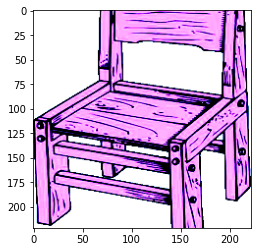

In [207]:
a = data[2].numpy()
a = np.moveaxis(a,0,-1)
plt.imshow(a)

In [211]:
from models.resnet import resnet18, resnet50
model = resnet18(pretrained=True, classes=args.n_classes, drop_perc=args.drop_perc)

In [219]:
device = torch.cuda.set_device(args.cuda)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")